In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal

In [2]:
params = {
    # exp
    "seed": 0,
    "exp_name": "depth",
    "cv_folds": 10,
    "plot": True,
    "calib_methods": ["RF", "RF_CT", "RF_fulldata", 
                      "Platt", "ISO", "Rank", "CRF", "VA", "Beta", "Elkan", "tlr", "Line", 
                      "RF_boot", 
                      "RF_ens_r", "RF_ens_line", "RF_ens_CRF", "RF_ens_Platt", "RF_ens_ISO",  "RF_ens_Beta", 
                      "RF_large", "RF_large_line", "RF_large_Platt", "RF_large_ISO",  "RF_large_Beta"],
    "metrics": ["acc", "tce", "logloss", "brier", "ece", "auc"],
    
    #data
    "data_name": "synthetic",
    "data_size": 1000,
    "n_features": 2,

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    # calib param
    "bin_strategy": "quantile",
    "ece_bins": 20,
    "boot_size": 5000,
    "boot_count": 40,

    # RF hyper opt
    "hyper_opt": False,
    "n_estimators": 100,
}
exp_key = "depth"
exp_values = [1,2,3,4,5,6,7,8,9]


In [3]:
calib_results_dict, data_list = cx.run_exp(exp_key, exp_values, params)

In [4]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

In [5]:
print(params["calib_methods"][tables["tce"].loc["Rank"].argmin()])
tables["tce"]

RF_ens_line


,RF,RF_CT,RF_fulldata,Platt,ISO,Rank,CRF,VA,Beta,Elkan,tlr,Line,RF_boot,RF_ens_r,RF_ens_line,RF_ens_CRF,RF_ens_Platt,RF_ens_ISO,RF_ens_Beta,RF_large,RF_large_line,RF_large_Platt,RF_large_ISO,RF_large_Beta
Data,,,,,,,,,,,,,,,,,,,,,,,,
1,0.031007,0.017878,0.031054,0.015014,0.020047,0.202539,0.021530,0.016608,0.016026,0.205552,0.017878,0.016200,0.030998,0.030946,0.015299,0.021673,0.014611,0.018006,0.015643,0.030841,0.017077,0.014750,0.019689,0.015854
2,0.011922,0.016234,0.012077,0.007512,0.014718,0.066682,0.009534,0.010431,0.008878,0.167859,0.017257,0.007186,0.011926,0.011941,0.007356,0.008680,0.007150,0.012701,0.008499,0.011900,0.009457,0.007208,0.013128,0.008563
3,0.005279,0.012859,0.005368,0.005087,0.011287,0.034086,0.005066,0.007612,0.006276,0.141847,0.014562,0.004665,0.005284,0.005071,0.004475,0.004985,0.004925,0.011246,0.006035,0.005103,0.005799,0.004940,0.010922,0.006039
4,0.003706,0.014906,0.003572,0.005234,0.010434,0.026522,0.003919,0.006833,0.005856,0.120578,0.017954,0.004804,0.003710,0.003551,0.004549,0.003954,0.005082,0.010991,0.005850,0.003571,0.005075,0.005095,0.010738,0.005839
5,0.004637,0.015878,0.004246,0.006262,0.011749,0.021001,0.005251,0.008020,0.006564,0.109323,0.020286,0.005894,0.004642,0.004241,0.005406,0.004886,0.005988,0.010646,0.006329,0.004206,0.006374,0.005970,0.011396,0.006303
6,0.006080,0.015657,0.005610,0.007471,0.012490,0.017760,0.007593,0.009231,0.007373,0.103140,0.020996,0.006575,0.006084,0.005860,0.006801,0.006877,0.007380,0.012533,0.007340,0.005905,0.009120,0.007482,0.012607,0.007459
7,0.008802,0.015828,0.008168,0.010069,0.014049,0.017400,0.010201,0.011105,0.009551,0.099768,0.021310,0.012317,0.008793,0.008102,0.008616,0.009334,0.009328,0.014652,0.009027,0.008172,0.009091,0.009389,0.014583,0.009107
8,0.011318,0.015908,0.010618,0.011925,0.017630,0.016413,0.011964,0.014152,0.011611,0.098729,0.020843,0.011310,0.011324,0.010591,0.011627,0.011166,0.011449,0.015913,0.010922,0.010705,0.013179,0.011542,0.015921,0.011030
9,0.014013,0.017208,0.013579,0.014291,0.018676,0.015736,0.014316,0.015744,0.013824,0.097491,0.021904,0.014798,0.014018,0.013230,0.012619,0.013727,0.013702,0.017971,0.012943,0.013258,0.013327,0.013748,0.018168,0.012989


In [6]:
print(params["calib_methods"][tables["brier"].loc["Rank"].argmin()])
tables["brier"]

RF_ens_line


,RF,RF_CT,RF_fulldata,Platt,ISO,Rank,CRF,VA,Beta,Elkan,tlr,Line,RF_boot,RF_ens_r,RF_ens_line,RF_ens_CRF,RF_ens_Platt,RF_ens_ISO,RF_ens_Beta,RF_large,RF_large_line,RF_large_Platt,RF_large_ISO,RF_large_Beta
Data,,,,,,,,,,,,,,,,,,,,,,,,
1,0.175129,0.162699,0.175442,0.160220,0.165755,0.347621,0.163315,0.160681,0.160857,0.344846,0.162699,0.160838,0.175121,0.174728,0.159434,0.162070,0.159418,0.160308,0.159969,0.174685,0.161286,0.159605,0.162577,0.160207
2,0.155217,0.161164,0.155584,0.151088,0.158038,0.210319,0.151950,0.153864,0.151969,0.306531,0.162616,0.150999,0.155213,0.154775,0.149298,0.151613,0.150200,0.155858,0.150907,0.154755,0.153069,0.150284,0.156581,0.150911
3,0.147573,0.157524,0.147889,0.147845,0.155901,0.179434,0.147328,0.151277,0.148183,0.279541,0.159724,0.146023,0.147586,0.146918,0.146799,0.146669,0.147041,0.153211,0.147281,0.146943,0.147636,0.147085,0.153533,0.147216
4,0.145073,0.158449,0.145749,0.147304,0.152393,0.166780,0.145489,0.147657,0.146726,0.256786,0.162325,0.146592,0.145071,0.144883,0.145528,0.145257,0.146988,0.152141,0.146729,0.144870,0.146476,0.147020,0.151738,0.146694
5,0.145924,0.159494,0.146700,0.148270,0.152822,0.163393,0.146261,0.150083,0.147236,0.244701,0.165443,0.147178,0.145947,0.145533,0.146282,0.146453,0.148166,0.151000,0.147231,0.145334,0.147503,0.147984,0.151903,0.147012
6,0.147251,0.159381,0.148257,0.149667,0.154494,0.157480,0.148976,0.150478,0.147776,0.237507,0.165737,0.147563,0.147242,0.147342,0.148617,0.148963,0.149909,0.154145,0.148267,0.147438,0.151434,0.150067,0.153891,0.148464
7,0.150703,0.160141,0.150711,0.153156,0.155430,0.157065,0.152691,0.152784,0.150482,0.234663,0.167289,0.155246,0.150682,0.150176,0.150998,0.152363,0.152423,0.155109,0.150304,0.150131,0.152366,0.152393,0.153929,0.150321
8,0.154004,0.160735,0.153871,0.155454,0.160530,0.158793,0.155592,0.157602,0.153105,0.233957,0.167546,0.153955,0.153998,0.153275,0.155132,0.153600,0.155029,0.159524,0.152599,0.153369,0.157061,0.155085,0.157971,0.152720
9,0.157856,0.162303,0.158651,0.158602,0.162605,0.158317,0.158442,0.160075,0.156816,0.234078,0.167701,0.157966,0.157804,0.156613,0.155510,0.157552,0.157788,0.161567,0.155118,0.156663,0.156421,0.157887,0.160711,0.155249


In [7]:
print(params["calib_methods"][tables["logloss"].loc["Rank"].argmin()])
tables["logloss"]

RF_large


,RF,RF_CT,RF_fulldata,Platt,ISO,Rank,CRF,VA,Beta,Elkan,tlr,Line,RF_boot,RF_ens_r,RF_ens_line,RF_ens_CRF,RF_ens_Platt,RF_ens_ISO,RF_ens_Beta,RF_large,RF_large_line,RF_large_Platt,RF_large_ISO,RF_large_Beta
Data,,,,,,,,,,,,,,,,,,,,,,,,
1,0.533958,1.182115,0.534477,0.490696,0.902288,9.490077,0.501117,0.497222,0.497800,0.959840,1.182115,0.491384,0.533937,0.533167,0.487343,0.498470,0.488750,1.108991,0.495465,0.533050,0.530350,0.488936,1.112681,0.495433
2,0.481032,1.191274,0.481813,0.464868,1.128724,4.223071,0.468951,0.472158,0.470987,0.866480,1.257977,0.526515,0.481029,0.480423,0.556873,0.468575,0.462634,1.155977,0.468072,0.480358,0.767505,0.462800,1.159649,0.467916
3,0.456733,0.892963,0.457144,0.454578,1.185500,2.580420,0.453981,0.462991,0.458523,0.809329,1.064567,0.606536,0.456768,0.455099,0.676775,0.451444,0.452754,1.143853,0.456804,0.455220,0.549049,0.452838,1.112564,0.456608
4,0.445372,0.866066,0.447497,0.452238,1.110773,1.615234,0.445258,0.452389,0.454796,0.767767,1.102987,0.513731,0.445364,0.445485,0.509895,0.445076,0.451378,1.205558,0.455074,0.445292,0.513017,0.451365,1.171452,0.454948
5,0.446704,0.833354,0.446998,0.454432,1.209142,1.441092,0.447075,0.460080,0.458010,0.747735,1.058505,0.547928,0.446748,0.444868,0.511245,0.446747,0.453766,1.171568,0.456846,0.444430,0.546414,0.453342,1.239498,0.456392
6,0.447810,0.664448,0.452362,0.457706,1.117248,1.219787,0.451331,0.458980,0.455017,0.734765,0.991971,0.481890,0.447758,0.449336,0.550172,0.453430,0.458265,1.113770,0.458879,0.449987,0.592226,0.458723,1.145558,0.460422
7,0.459985,0.732267,0.458937,0.466879,1.119592,1.119039,0.465497,0.467771,0.463034,0.734411,1.059780,0.536919,0.459897,0.458489,0.525430,0.463658,0.465223,1.151939,0.463547,0.458899,0.656462,0.465212,1.081687,0.464107
8,0.474413,0.699071,0.469807,0.474178,1.232658,1.222837,0.478220,0.480321,0.472575,0.739729,0.928849,0.474342,0.474324,0.469964,0.567311,0.471289,0.472540,1.067599,0.468814,0.471050,0.643087,0.472855,1.128174,0.469522
9,0.492696,0.765155,0.490085,0.483076,1.205679,1.288024,0.495156,0.489148,0.486209,0.751949,1.079432,0.706901,0.492503,0.482914,0.572334,0.486191,0.480315,1.169555,0.475209,0.482858,0.545780,0.480544,1.167075,0.475369


In [8]:
print(params["calib_methods"][tables["ece"].loc["Rank"].argmin()])
tables["ece"]

VA


,RF,RF_CT,RF_fulldata,Platt,ISO,Rank,CRF,VA,Beta,Elkan,tlr,Line,RF_boot,RF_ens_r,RF_ens_line,RF_ens_CRF,RF_ens_Platt,RF_ens_ISO,RF_ens_Beta,RF_large,RF_large_line,RF_large_Platt,RF_large_ISO,RF_large_Beta
Data,,,,,,,,,,,,,,,,,,,,,,,,
1,0.020930,0.012508,0.021971,0.005100,0.006707,0.217853,0.010986,0.001298,0.005331,0.191757,0.012508,0.004438,0.021015,0.021453,0.004782,0.007013,0.003637,0.007296,0.004973,0.020449,0.004751,0.003716,0.007817,0.005095
2,0.010685,0.010376,0.009199,0.005205,0.006729,0.064379,0.004527,0.002891,0.004001,0.161514,0.012945,0.004842,0.010676,0.009089,0.004991,0.004018,0.004492,0.004600,0.003066,0.009488,0.004332,0.004706,0.005570,0.003938
3,0.003839,0.011627,0.004704,0.004179,0.004490,0.024343,0.004556,0.003979,0.004027,0.135610,0.013450,0.003845,0.003678,0.004242,0.002347,0.004669,0.004900,0.005002,0.004165,0.005151,0.003861,0.004814,0.004765,0.004179
4,0.002998,0.014219,0.003119,0.005413,0.003973,0.015257,0.003634,0.002257,0.005824,0.114461,0.020291,0.004252,0.002884,0.003927,0.004450,0.004872,0.005560,0.004477,0.005008,0.003738,0.003227,0.006347,0.003523,0.006503
5,0.003459,0.016298,0.002805,0.005297,0.003885,0.008676,0.003060,0.002185,0.005979,0.102007,0.022492,0.002841,0.003459,0.004219,0.003732,0.004130,0.006555,0.002283,0.006204,0.003670,0.004402,0.006796,0.005901,0.006537
6,0.002403,0.013872,0.003323,0.006503,0.006199,0.010303,0.005094,0.002136,0.005068,0.092442,0.020183,0.002870,0.002404,0.004308,0.003460,0.003888,0.006781,0.006125,0.006062,0.006085,0.004059,0.006436,0.003907,0.005658
7,0.003856,0.010410,0.004553,0.007453,0.004264,0.006781,0.005709,0.003502,0.005123,0.087384,0.019231,0.004621,0.004612,0.004661,0.004348,0.004510,0.005536,0.004367,0.003423,0.004417,0.003665,0.005365,0.005716,0.003254
8,0.005106,0.008092,0.006107,0.005730,0.010677,0.009473,0.006661,0.003863,0.003177,0.084885,0.016047,0.002719,0.005491,0.004256,0.003504,0.004489,0.005192,0.007252,0.003437,0.003942,0.004316,0.004835,0.005554,0.003087
9,0.005462,0.008102,0.005736,0.005175,0.004852,0.006528,0.007405,0.002471,0.003287,0.081234,0.016537,0.003428,0.006073,0.005468,0.005305,0.005639,0.005899,0.009204,0.003520,0.004826,0.004079,0.005262,0.007161,0.002819


In [9]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF',
 'RF_CT',
 'RF_fulldata',
 'Platt',
 'ISO',
 'Rank',
 'CRF',
 'VA',
 'Beta',
 'Elkan',
 'tlr',
 'Line',
 'RF_boot',
 'RF_ens_r',
 'RF_ens_line',
 'RF_ens_CRF',
 'RF_ens_Platt',
 'RF_ens_ISO',
 'RF_ens_Beta',
 'RF_large',
 'RF_large_line',
 'RF_large_Platt',
 'RF_large_ISO',
 'RF_large_Beta']

In [10]:
tables["tce"]

,RF,RF_CT,RF_fulldata,Platt,ISO,Rank,CRF,VA,Beta,Elkan,tlr,Line,RF_boot,RF_ens_r,RF_ens_line,RF_ens_CRF,RF_ens_Platt,RF_ens_ISO,RF_ens_Beta,RF_large,RF_large_line,RF_large_Platt,RF_large_ISO,RF_large_Beta
Data,,,,,,,,,,,,,,,,,,,,,,,,
1,0.031007,0.017878,0.031054,0.015014,0.020047,0.202539,0.021530,0.016608,0.016026,0.205552,0.017878,0.016200,0.030998,0.030946,0.015299,0.021673,0.014611,0.018006,0.015643,0.030841,0.017077,0.014750,0.019689,0.015854
2,0.011922,0.016234,0.012077,0.007512,0.014718,0.066682,0.009534,0.010431,0.008878,0.167859,0.017257,0.007186,0.011926,0.011941,0.007356,0.008680,0.007150,0.012701,0.008499,0.011900,0.009457,0.007208,0.013128,0.008563
3,0.005279,0.012859,0.005368,0.005087,0.011287,0.034086,0.005066,0.007612,0.006276,0.141847,0.014562,0.004665,0.005284,0.005071,0.004475,0.004985,0.004925,0.011246,0.006035,0.005103,0.005799,0.004940,0.010922,0.006039
4,0.003706,0.014906,0.003572,0.005234,0.010434,0.026522,0.003919,0.006833,0.005856,0.120578,0.017954,0.004804,0.003710,0.003551,0.004549,0.003954,0.005082,0.010991,0.005850,0.003571,0.005075,0.005095,0.010738,0.005839
5,0.004637,0.015878,0.004246,0.006262,0.011749,0.021001,0.005251,0.008020,0.006564,0.109323,0.020286,0.005894,0.004642,0.004241,0.005406,0.004886,0.005988,0.010646,0.006329,0.004206,0.006374,0.005970,0.011396,0.006303
6,0.006080,0.015657,0.005610,0.007471,0.012490,0.017760,0.007593,0.009231,0.007373,0.103140,0.020996,0.006575,0.006084,0.005860,0.006801,0.006877,0.007380,0.012533,0.007340,0.005905,0.009120,0.007482,0.012607,0.007459
7,0.008802,0.015828,0.008168,0.010069,0.014049,0.017400,0.010201,0.011105,0.009551,0.099768,0.021310,0.012317,0.008793,0.008102,0.008616,0.009334,0.009328,0.014652,0.009027,0.008172,0.009091,0.009389,0.014583,0.009107
8,0.011318,0.015908,0.010618,0.011925,0.017630,0.016413,0.011964,0.014152,0.011611,0.098729,0.020843,0.011310,0.011324,0.010591,0.011627,0.011166,0.011449,0.015913,0.010922,0.010705,0.013179,0.011542,0.015921,0.011030
9,0.014013,0.017208,0.013579,0.014291,0.018676,0.015736,0.014316,0.015744,0.013824,0.097491,0.021904,0.014798,0.014018,0.013230,0.012619,0.013727,0.013702,0.017971,0.012943,0.013258,0.013327,0.013748,0.018168,0.012989


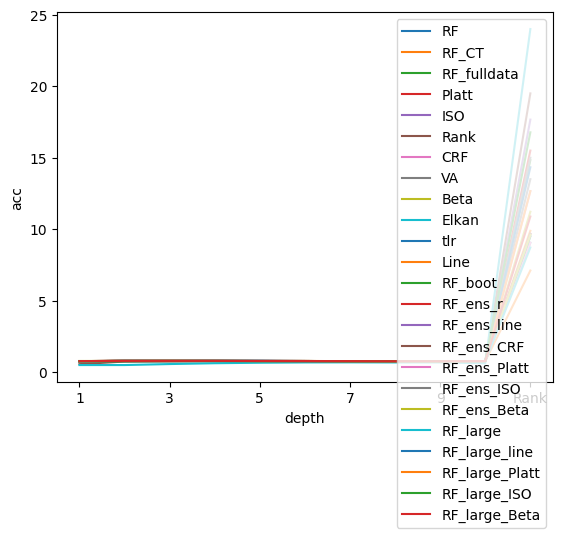

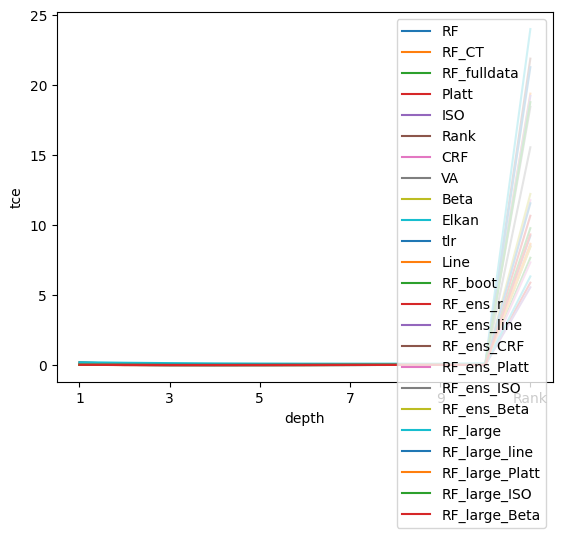

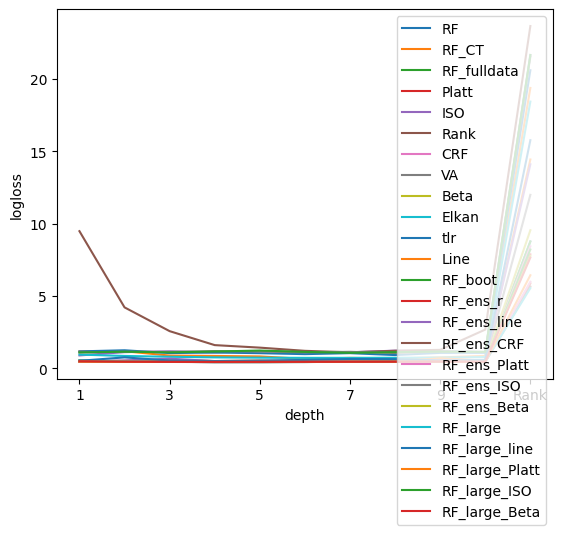

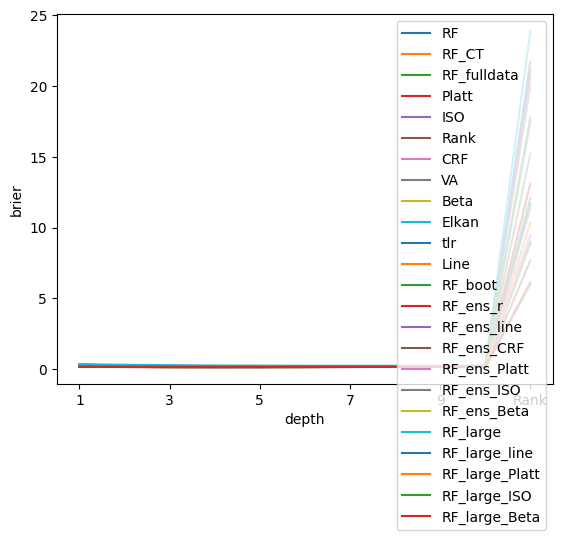

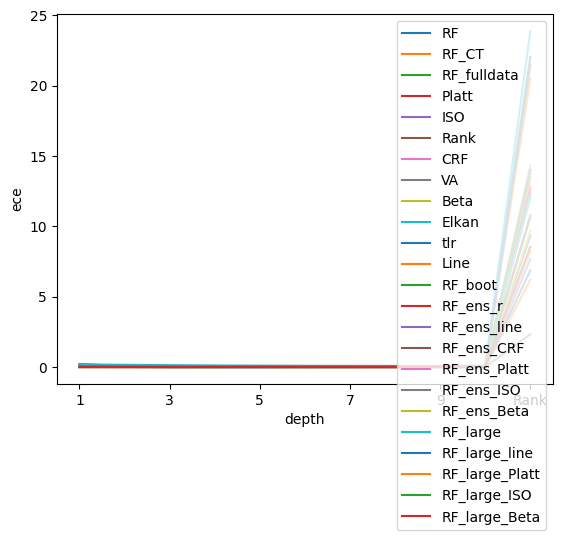

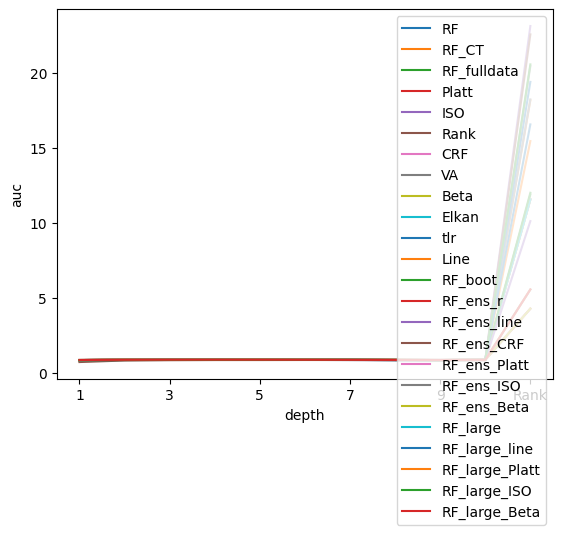

In [11]:
for metric in params["metrics"]:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(exp_key)
    ax.set_ylabel(metric)